In [2]:
#Loading the embeddings
import pickle

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

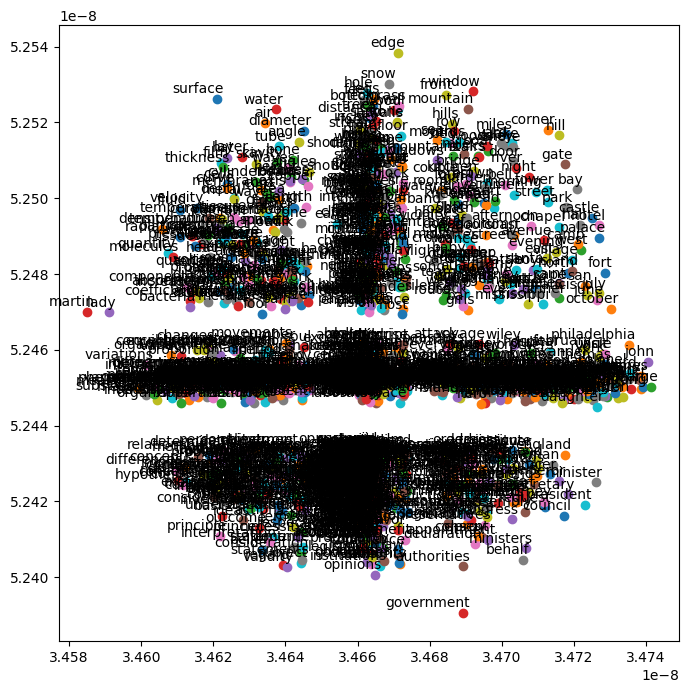

In [3]:
#Vizualizing data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array(embeddings)
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    fig=plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    def on_scroll(event):
      plt.view_init(elev=plt.elev + event.step, azim=plt.azim)
      plt.draw()

    fig.canvas.mpl_connect('scroll_event', on_scroll)
    plt.show()

# Replace your_data with your 300-dimensional data
data_1900=[]
data_2000=[]
for wE in data['E']:
  data_1900.append(wE[0])
  data_2000.append(wE[-1])

visualize_embeddings(data_1900, data['w'])

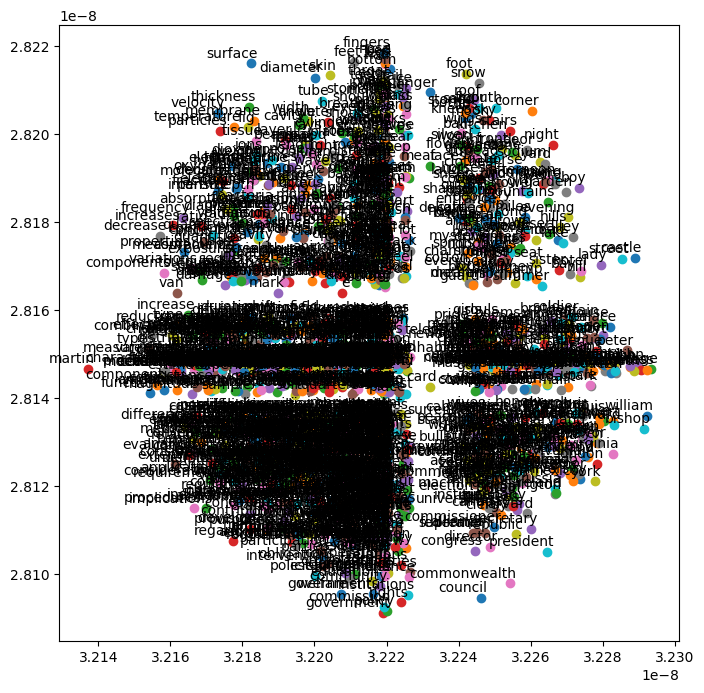

In [4]:
visualize_embeddings(data_2000, data['w'])

In [5]:
#Different functions to measure overall change

# Max of Changes
def max_of_changes(dist_list,word_list):
  max_dist_per_word_per_decade = {}
  for word in word_list:
    max_dist_per_word_per_decade[word] = np.max(dist_list[word])
  sorted_dict_max = dict(sorted(max_dist_per_word_per_decade.items(),key=lambda item: item[0]))
  words_by_distance=list(dict(sorted(max_dist_per_word_per_decade.items(),key=lambda item: item[1])).keys())
  bottom_20 = words_by_distance[:20]
  top_20 = words_by_distance[-20:]
  return bottom_20,top_20, sorted_dict_max

def max_sum_of_changes(dist_list,word_list):
  max_dist_per_word_sum = {}
  for word in word_list:
    max_dist_per_word_sum[word] = np.sum(np.array(dist_list[word]))
  sorted_dict_sum = dict(sorted(max_dist_per_word_sum.items(),key=lambda item: item[0]))
  words_by_distance_sum=list(dict(sorted(max_dist_per_word_sum.items(),key=lambda item: item[1])).keys())
  bottom_20_sum = words_by_distance_sum[:20]
  top_20_sum = words_by_distance_sum[-20:]
  return bottom_20_sum,top_20_sum,sorted_dict_sum

def final_change(base_dist_list,word_list):
  dist_per_word = {}
  for word in word_list:
    dist_per_word[word] = base_dist_list[word][0]
  sorted_dict_t = dict(sorted(dist_per_word.items(),key=lambda item: item[0]))
  words_by_distance_t=list(dict(sorted(dist_per_word.items(),key=lambda item: item[1])).keys())
  bottom_20_t = words_by_distance_t[:20]
  top_20_t = words_by_distance_t[-20:]
  return bottom_20_t,top_20_t,sorted_dict_t

In [6]:
# Similarity Measure 1
# Cosine distance
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cd= {}
cd_wrt_final_yr = {}

for wn,word in enumerate(data['w']):
  cosine_distance_per_year=[]
  cosine_distance_wrt_final_year =[]
  for i in range(len(data['E'][wn])-1):
    cosine_distance_per_year.append(1-(cosine_similarity(data['E'][wn][i+1].reshape(1,-1),data['E'][wn][i].reshape(1,-1)))[0][0])
    cosine_distance_wrt_final_year.append(1-(cosine_similarity(data['E'][wn][len(data['E'][wn])-1].reshape(1,-1),data['E'][wn][i].reshape(1,-1)))[0][0])
  cd[word]=cosine_distance_per_year
  cd_wrt_final_yr[word]=cosine_distance_wrt_final_year

# Calculating maximum changing words - per decade
bottom_20_cd,top_20_cd,sorted_dict_cd = max_of_changes(cd,data['w'])
print("Top 20 words that changed the most in a decade: \n", top_20_cd)
print("Top 20 words that changed the least in a decade: \n", bottom_20_cd)
print("\n")

# Calculating maximum changing words - sum
bottom_20_sum_cd,top_20_sum_cd, sorted_dict_sum_cd = max_sum_of_changes(cd,data['w'])
print("Top 20 words that changed the most (sum of changes) : \n", top_20_sum_cd)
print("Top 20 words that changed the least (sum of changes) : \n", bottom_20_sum_cd)
print("\n")

# Just the ends:
bottom_20_t_cd,top_20_t_cd, sorted_dict_t_cd = final_change(cd_wrt_final_yr,data['w'])
print("Top 20 words that changed the most (tn-t0): \n", top_20_t_cd)
print("Top 20 words that changed the least (tn-t0): \n", bottom_20_t_cd)
print("\n")

Top 20 words that changed the most in a decade: 
 ['jones', 'radio', 'implications', 'variables', 'jobs', 'procedures', 'wiley', 'therapy', 'input', 'evaluation', 'programs', 'sector', 'objectives', 'goals', 'computer', 'techniques', 'skills', 'shri', 'mcgraw', 'ml']
Top 20 words that changed the least in a decade: 
 ['april', 'november', 'december', 'january', 'september', 'trees', 'miles', 'solution', 'feet', 'june', 'february', 'vessels', 'century', 'duties', 'cent', 'blood', 'evening', 'buildings', 'decrease', 'july']


Top 20 words that changed the most (sum of changes) : 
 ['haven', 'goals', 'johnson', 'therapy', 'adams', 'wilson', 'princeton', 'martin', 'baltimore', 'wiley', 'berkeley', 'techniques', 'sector', 'ml', 'jones', 'harper', 'mcgraw', 'skills', 'computer', 'shri']
Top 20 words that changed the least (sum of changes) : 
 ['april', 'miles', 'november', 'september', 'january', 'december', 'february', 'university', 'vessels', 'trees', 'cent', 'solution', 'july', 'decrease'

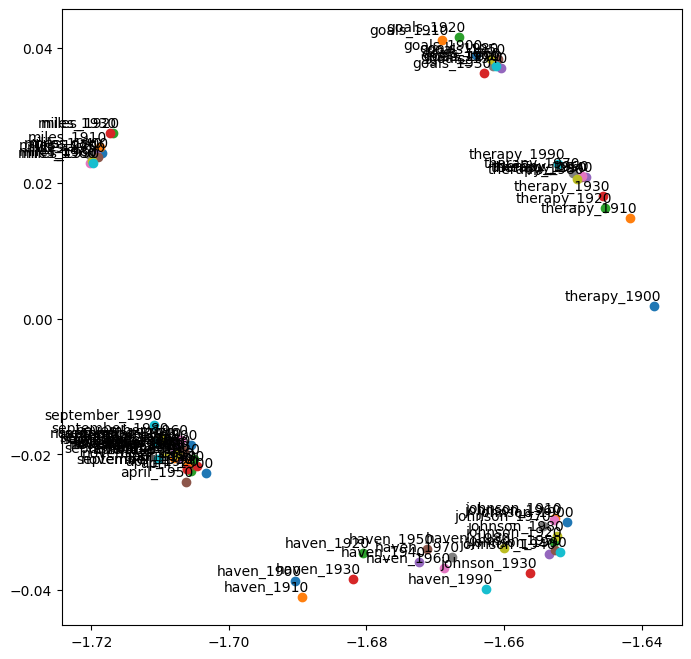

In [7]:
# Visual Understanding of change
# We can view top changing embeddings more spread out than the bottom ones.
we =[]
ws=[]
for i,w in enumerate(data['w']):
  if w in top_20_sum_cd[:4] or w in bottom_20_sum_cd[:4]:
    for j in range(10):
      we.append(data['E'][i][j])
      ws.append(w+"_"+str(data['d'][j]))

visualize_embeddings(we,ws)

In [8]:
def normalize(e_data):
  n_data=[]
  epsilon=1e-10
  for i in range(len(e_data)):
    data_t = np.array(e_data[i])+epsilon
    max_v=np.max(data_t)
    min_v = np.min(data_t)
    norm_data = (data_t-min_v)/(max_v-min_v)
    n_data.append(norm_data)
  return n_data


In [9]:
# # Similarity Measure 2
# JS Distance
from scipy.spatial.distance import jensenshannon
import numpy as np

jsd= {}
jsd_wrt_final_yr = {}
normalized_embeddings = normalize(data['E'])

for wn,word in enumerate(data['w']):
  jensen_s_d_per_year=[]
  jensen_s_d_wrt_final_year =[]
  for i in range(len(data['E'][wn])-1):
    jensen_s_d_per_year.append(jensenshannon(normalized_embeddings[wn][i+1],normalized_embeddings[wn][i]))
    jensen_s_d_wrt_final_year.append(jensenshannon(normalized_embeddings[wn][len(data['E'][wn])-1],normalized_embeddings[wn][i]))
  jsd[word]=jensen_s_d_per_year
  jsd_wrt_final_yr[word]=jensen_s_d_wrt_final_year

# Calculating maximum changing words - per decade
bottom_20_jsd,top_20_jsd,sorted_dict_jsd = max_of_changes(jsd,data['w'])
print("Top 20 words that changed the most in a decade: \n", top_20_jsd)
print("Top 20 words that changed the least in a decade: \n", bottom_20_jsd)
print("\n")

# Calculating maximum changing words - sum
bottom_20_sum_jsd,top_20_sum_jsd, sorted_dict_sum_jsd = max_sum_of_changes(jsd,data['w'])
print("Top 20 words that changed the most (sum of changes) : \n", top_20_sum_jsd)
print("Top 20 words that changed the least (sum of changes) : \n", bottom_20_sum_jsd)
print("\n")

# Just the ends:
bottom_20_t_jsd,top_20_t_jsd, sorted_dict_t_jsd = final_change(jsd_wrt_final_yr,data['w'])
print("Top 20 words that changed the most (tn-t0): \n", top_20_t_jsd)
print("Top 20 words that changed the least (tn-t0): \n", bottom_20_t_jsd)
print("\n")

Top 20 words that changed the most in a decade: 
 ['adams', 'electrons', 'h', 'media', 'procedures', 'shri', 'wilson', 'publications', 'ml', 'evaluation', 'therapy', 'jones', 'implications', 'computer', 'technology', 'techniques', 'goals', 'input', 'sector', 'objectives']
Top 20 words that changed the least in a decade: 
 ['stages', 'disease', 'piece', 'bit', 'variety', 'detail', 'canal', 'philosophy', 'countries', 'languages', 'water', 'functions', 'execution', 'religion', 'jesus', 'temperatures', 'reader', 'language', 'poems', 'communities']


Top 20 words that changed the most (sum of changes) : 
 ['kings', 'philip', 'grand', 'netherlands', 'media', 'time', 'berkeley', 'h', 'separation', 'course', 'adams', 'input', 'ireland', 'joseph', 'objectives', 'sector', 'wilson', 'technology', 'jones', 'publications']
Top 20 words that changed the least (sum of changes) : 
 ['stages', 'temperature', 'functions', 'execution', 'piece', 'disease', 'reader', 'detail', 'variety', 'bit', 'religion',

In [10]:
## Similarity Measure 3
# Minkowski distance / Euclidean distance
from scipy.spatial.distance import minkowski
import numpy as np

mksd= {}
mksd_wrt_final_yr = {}

for wn,word in enumerate(data['w']):
  minkowski_d_per_year=[]
  minkowski_d_wrt_final_year =[]
  for i in range(len(data['E'][wn])-1):
    minkowski_d_per_year.append(minkowski(data['E'][wn][i],data['E'][wn][i+1],2))
    minkowski_d_wrt_final_year.append(minkowski(data['E'][wn][len(data['E'][wn])-1],data['E'][wn][i+1],2))
  mksd[word]=minkowski_d_per_year
  mksd_wrt_final_yr[word]=minkowski_d_wrt_final_year

# Calculating maximum changing words - per decade
bottom_20_md,top_20_md,sorted_dict_md = max_of_changes(mksd,data['w'])
print("Top 20 words that changed the most in a decade: \n", top_20_md)
print("Top 20 words that changed the least in a decade: \n", bottom_20_md)
print("\n")

# Calculating maximum changing words - sum
bottom_20_sum_md,top_20_sum_md, sorted_dict_sum_md = max_sum_of_changes(mksd,data['w'])
print("Top 20 words that changed the most (sum of changes) : \n", top_20_sum_md)
print("Top 20 words that changed the least (sum of changes) : \n", bottom_20_sum_md)
print("\n")

# Just the ends:
bottom_20_t_md,top_20_t_md, sorted_dict_t_md = final_change(mksd_wrt_final_yr,data['w'])
print("Top 20 words that changed the most (tn-t0): \n", top_20_t_md)
print("Top 20 words that changed the least (tn-t0): \n", bottom_20_t_md)
print("\n")

Top 20 words that changed the most in a decade: 
 ['ml', 'skills', 'shri', 'jones', 'techniques', 'radio', 'implications', 'mcgraw', 'variables', 'jobs', 'procedures', 'wiley', 'therapy', 'computer', 'input', 'evaluation', 'programs', 'sector', 'objectives', 'goals']
Top 20 words that changed the least in a decade: 
 ['april', 'november', 'december', 'january', 'september', 'trees', 'miles', 'solution', 'feet', 'june', 'february', 'vessels', 'century', 'duties', 'cent', 'blood', 'evening', 'buildings', 'decrease', 'july']


Top 20 words that changed the most (sum of changes) : 
 ['maryland', 'stanford', 'publications', 'evaluation', 'mcgraw', 'therapy', 'j', 'philip', 'haven', 'johnson', 'adams', 'wilson', 'sector', 'wiley', 'princeton', 'martin', 'baltimore', 'berkeley', 'jones', 'harper']
Top 20 words that changed the least (sum of changes) : 
 ['april', 'miles', 'november', 'september', 'january', 'december', 'february', 'university', 'vessels', 'trees', 'cent', 'solution', 'july', 

In [11]:
## Similarity Measure 4
# Canberra distance
from scipy.spatial.distance import canberra
import numpy as np

csd= {}
csd_wrt_final_yr = {}

for wn,word in enumerate(data['w']):
  canberra_d_per_year=[]
  canberra_d_wrt_final_year =[]
  for i in range(len(data['E'][wn])-1):
    canberra_d_per_year.append(canberra(data['E'][wn][i],data['E'][wn][i+1]))
    canberra_d_wrt_final_year.append(canberra(data['E'][wn][len(data['E'][wn])-1],data['E'][wn][i+1]))
  csd[word]=canberra_d_per_year
  csd_wrt_final_yr[word]=canberra_d_wrt_final_year

# Calculating maximum changing words - per decade
bottom_20_cnd,top_20_cnd, sorted_dict_cnd = max_of_changes(csd,data['w'])
print("Top 20 words that changed the most in a decade: \n", top_20_cnd)
print("Top 20 words that changed the least in a decade: \n", bottom_20_cnd)
print("\n")

# Calculating maximum changing words - sum
bottom_20_sum_cnd,top_20_sum_cnd,sorted_dict_sum_cnd = max_sum_of_changes(csd,data['w'])
print("Top 20 words that changed the most (sum of changes) : \n", top_20_sum_cnd)
print("Top 20 words that changed the least (sum of changes) : \n", bottom_20_sum_cnd)
print("\n")

# Just the ends:
bottom_20_t_cnd,top_20_t_cnd, sorted_dict_t_cnd = final_change(csd_wrt_final_yr,data['w'])
print("Top 20 words that changed the most (tn-t0): \n", top_20_t_cnd)
print("Top 20 words that changed the least (tn-t0): \n", bottom_20_t_cnd)
print("\n")

Top 20 words that changed the most in a decade: 
 ['electron', 'correlation', 'radio', 'variables', 'procedures', 'jobs', 'input', 'wiley', 'therapy', 'sector', 'evaluation', 'programs', 'goals', 'objectives', 'computer', 'techniques', 'skills', 'shri', 'mcgraw', 'ml']
Top 20 words that changed the least in a decade: 
 ['november', 'december', 'september', 'january', 'april', 'june', 'century', 'vessels', 'february', 'university', 'cent', 'months', 'defendant', 'october', 'manufacture', 'daughter', 'plaintiff', 'diagnosis', 'depth', 'increase']


Top 20 words that changed the most (sum of changes) : 
 ['haven', 'holland', 'example', 'georgia', 'philip', 'johnson', 'publications', 'adams', 'wilson', 'sector', 'j', 'baltimore', 'martin', 'wiley', 'jones', 'berkeley', 'harper', 'princeton', 'mcgraw', 'shri']
Top 20 words that changed the least (sum of changes) : 
 ['april', 'january', 'december', 'november', 'september', 'june', 'february', 'miles', 'defendant', 'daughter', 'march', 'diag

From visual inspection and logical interpretation, the sum of changes performed the best in estimating the total change in the word across time

In [12]:
# Intercorrelations between the methods
from scipy.stats import pearsonr

cd_jsd_corr, _ = pearsonr(list(sorted_dict_sum_cd.values()), list(sorted_dict_sum_jsd.values()))
cd_md_corr, _ = pearsonr(list(sorted_dict_sum_cd.values()), list(sorted_dict_sum_md.values()))
cd_cnd_corr, _ = pearsonr(list(sorted_dict_sum_cd.values()), list(sorted_dict_sum_cnd.values()))
jsd_md_corr, _ = pearsonr(list(sorted_dict_sum_jsd.values()), list(sorted_dict_sum_md.values()))
jsd_cnd_corr, _ = pearsonr(list(sorted_dict_sum_jsd.values()), list(sorted_dict_sum_cnd.values()))
md_cnd_corr, _ = pearsonr(list(sorted_dict_sum_md.values()), list(sorted_dict_sum_cnd.values()))



correlation_matrix = np.array([[1, cd_jsd_corr, cd_md_corr,cd_cnd_corr],
                               [cd_jsd_corr, 1, jsd_md_corr, jsd_cnd_corr],
                               [cd_md_corr, jsd_md_corr, 1,md_cnd_corr],
                               [cd_cnd_corr,jsd_cnd_corr,md_cnd_corr,1]])

print(correlation_matrix)




[[1.         0.4830626  0.91536708 0.89243519]
 [0.4830626  1.         0.51280742 0.38706852]
 [0.91536708 0.51280742 1.         0.91093029]
 [0.89243519 0.38706852 0.91093029 1.        ]]


In [16]:
# Accuracy analysis 1:
# wrt Human annotated scores from paper

import pandas as pd

ann_data= pd.read_csv('aggregate.csv')
lemmas_total=set(ann_data['lemma'])
common_words = [w for w in lemmas_total if w in data['w']]

lemma = list(ann_data['lemma'])
human_similarity = list(ann_data['sim_score'])
sim_scores = [1-(np.mean(list(map(int, simm.split('\n') )))/4) for simm in human_similarity]

sim_score_per_lemma = [[] for i in range(len(common_words))]

for i,l in enumerate(lemma):
  if l in common_words:
    j=common_words.index(l)
    sim_score_per_lemma[j].append(sim_scores[i])

human_avg_sim_scores = [np.sum(scores) for scores in sim_score_per_lemma]

# Scores for metrics

cd_avg_sim_scores = []
jsd_avg_sim_scores = []
md_avg_sim_scores = []
cnd_avg_sim_scores =[]

for w in common_words:
  cd_avg_sim_scores.append(sorted_dict_sum_cd[w])
  jsd_avg_sim_scores.append(sorted_dict_sum_jsd[w])
  md_avg_sim_scores.append(sorted_dict_sum_md[w])
  cnd_avg_sim_scores.append(sorted_dict_sum_cnd[w])


#Pearson Correlation
from scipy import stats

P_cd = stats.pearsonr(human_avg_sim_scores, cd_avg_sim_scores)
P_jsd = stats.pearsonr(human_avg_sim_scores, jsd_avg_sim_scores)
P_md = stats.pearsonr(human_avg_sim_scores, md_avg_sim_scores)
P_cnd = stats.pearsonr(human_avg_sim_scores, cnd_avg_sim_scores)

print('The Pearson Correlations are as follows:')
print('Cosine Distance: ',P_cd)
print('JS Distance: ',P_jsd)
print('Minkowski Distance: ',P_md)
print('Canberra Distance: ',P_cnd)


The Pearson Correlations are as follows:
Cosine Distance:  PearsonRResult(statistic=0.32439715413187825, pvalue=0.594327789014252)
JS Distance:  PearsonRResult(statistic=-0.45316333545545223, pvalue=0.44342050308245123)
Minkowski Distance:  PearsonRResult(statistic=0.3310434258111784, pvalue=0.5863328435914537)
Canberra Distance:  PearsonRResult(statistic=0.13866219160060805, pvalue=0.8240172183599803)


In [14]:
# Accuracy analysis 2:
# Change/ No Change classification

# Estimated change or no change through threshholding
#Threshold values set to roughly provide 200 changed words
def threshold_changes(sorted_dict,thr):
  thr_changing_words = {}
  min_v= min(sorted_dict.values())
  max_v= max(sorted_dict.values())
  for w in sorted_dict.keys():
    if ((sorted_dict[w]-min_v)/(max_v-min_v)) >= thr:
      thr_changing_words[w] = 1
    else:
      thr_changing_words[w] = 0
  return thr_changing_words

thr_changing_words_cd = threshold_changes(sorted_dict_cd,0.2)
thr_changing_words_jsd = threshold_changes(sorted_dict_jsd,0.4)
thr_changing_words_md = threshold_changes(sorted_dict_md,0.35)
thr_changing_words_cnd = threshold_changes(sorted_dict_cnd,0.2)

thr_ann_data = pd.read_csv('DiachronicChangingWords.csv')
human_ann_c_words = dict(zip(thr_ann_data['WORDS'],thr_ann_data['OED']))

sorted_hacw = dict(sorted(human_ann_c_words.items(),key=lambda item: item[0]))


#Pearson Correlation
P_cd = stats.pearsonr(list(sorted_hacw.values()), list(thr_changing_words_cd.values()))
P_jsd = stats.pearsonr(list(sorted_hacw.values()), list(thr_changing_words_jsd.values()))
P_md = stats.pearsonr(list(sorted_hacw.values()), list(thr_changing_words_md.values()))
P_cnd = stats.pearsonr(list(sorted_hacw.values()), list(thr_changing_words_cnd.values()))

print('The Pearson Correlations are as follows:')
print('Cosine Distance: ',P_cd)
print('JS Distance: ',P_jsd)
print('Minkowski Distance: ',P_md)
print('Canberra Distance: ',P_cnd)


The Pearson Correlations are as follows:
Cosine Distance:  PearsonRResult(statistic=0.10631295771448412, pvalue=1.8885658860878716e-06)
JS Distance:  PearsonRResult(statistic=0.09099189573400397, pvalue=4.597615411824621e-05)
Minkowski Distance:  PearsonRResult(statistic=0.10740739342800057, pvalue=1.4769145108832077e-06)
Canberra Distance:  PearsonRResult(statistic=0.08006651964227057, pvalue=0.0003381125215344649)


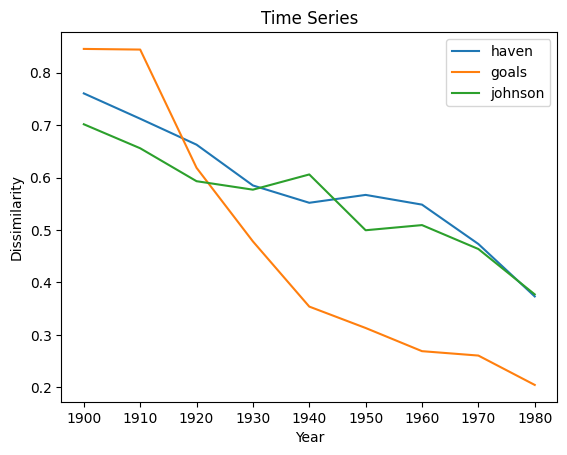

In [35]:
# Change point detection
# Looking at both accuracy measures, cosine distance and Minkowski distance seems to be performing well.
# Thus doing change point for one of them: Cosine distance

#NOTE: The time series is plotted with respect to final year i.e how dissimilar the word is compared to final year

top_3_changing_words = ['haven', 'goals', 'johnson']

#Time Series
word1_d= cd_wrt_final_yr[top_3_changing_words[0]].copy()
word2_d= cd_wrt_final_yr[top_3_changing_words[1]].copy()
word3_d= cd_wrt_final_yr[top_3_changing_words[2]].copy()

# Plotting Time Series
x=np.arange(9)
plt.plot(x, word1_d, label='haven')
plt.plot(x, word2_d, label='goals')
plt.plot(x, word3_d, label='johnson')

# Add a legend
plt.legend()

# Set labels and a title
plt.xlabel('Year')
plt.ylabel('Dissimilarity')
plt.title('Time Series')

custom_x_ticks = np.arange(9)
custom_x_labels =data['d'][:-1]
plt.xticks(custom_x_ticks, custom_x_labels)

# Display the plot
plt.show()


In [25]:
!pip install changefinder

In [26]:
import changefinder

# ChangeFinder
def findChangePoints_changeFinder(ts, r, order, smooth):
    '''
        r: Discounting rate
        order: AR model order
        smooth: smoothing window size T
    '''
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)
    ts_score = [cf.update(p) for p in ts]

    return ts_score

def plotChangePoints_changeFinder(df, ts, ts_score, title):

    fig, ax1 = plt.subplots(figsize=(16,4))
    ax2 = ax1.twinx()
    ax1.plot(np.arange(len(df)), ts)
    ax2.plot(np.arange(len(df)), ts_score, color='red')

    ax1.set_ylabel('dissimilarity score')
    ax1.grid(axis='x', alpha=0.7)

    custom_x_ticks = np.arange(len(df))
    custom_x_labels =data['d'][:len(df)]
    plt.xticks(custom_x_ticks, custom_x_labels)

    ax2.set_ylabel('CP Score')
    ax2.set_title(title)
    plt.show()


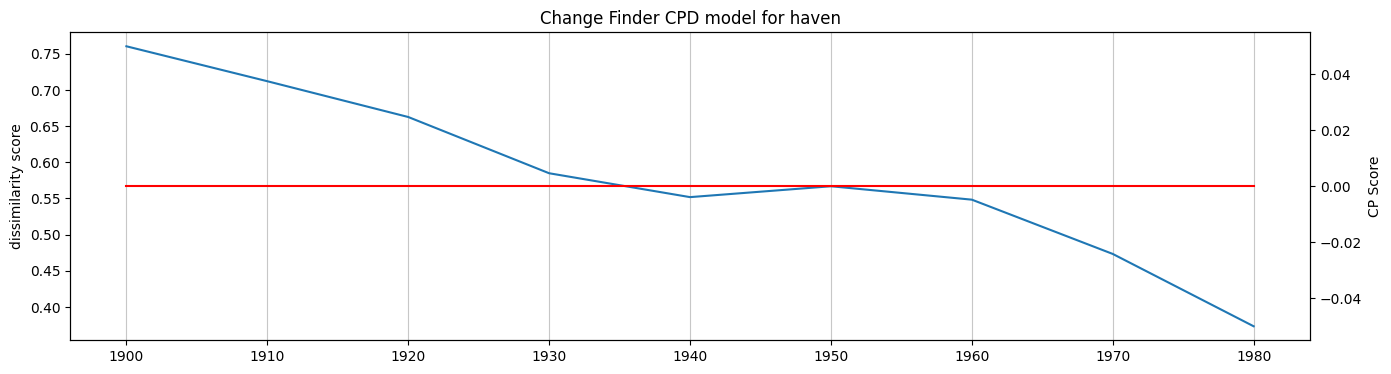

In [27]:
tsd = np.array(word1_d)

cp_score = findChangePoints_changeFinder(tsd, r=0.01, order=3, smooth=7)
plotChangePoints_changeFinder(word1_d, tsd, cp_score, 'Change Finder CPD model for '+top_3_changing_words[0])

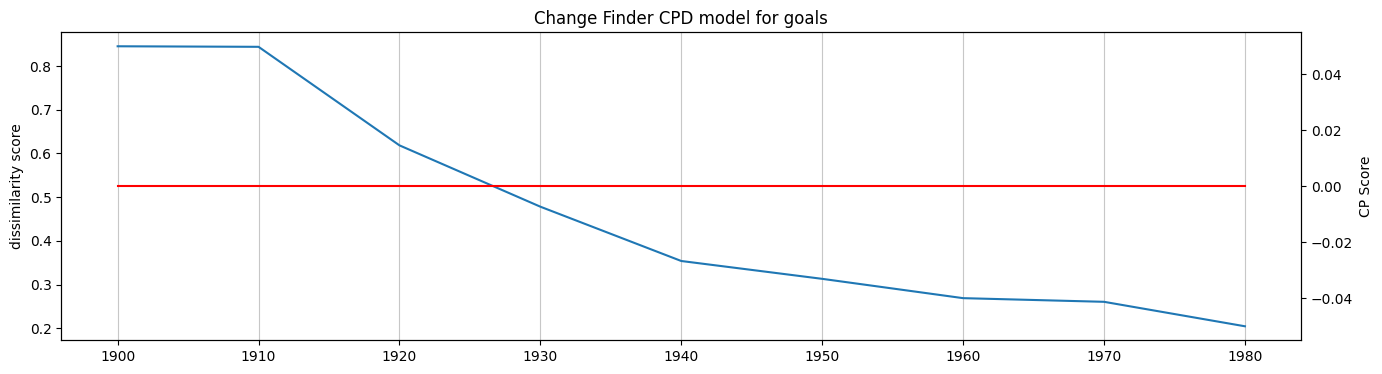

In [28]:
tsd = np.array(word2_d)

cp_score = findChangePoints_changeFinder(tsd, r=0.01, order=3, smooth=7)
plotChangePoints_changeFinder(word1_d, tsd, cp_score, 'Change Finder CPD model for '+top_3_changing_words[1])

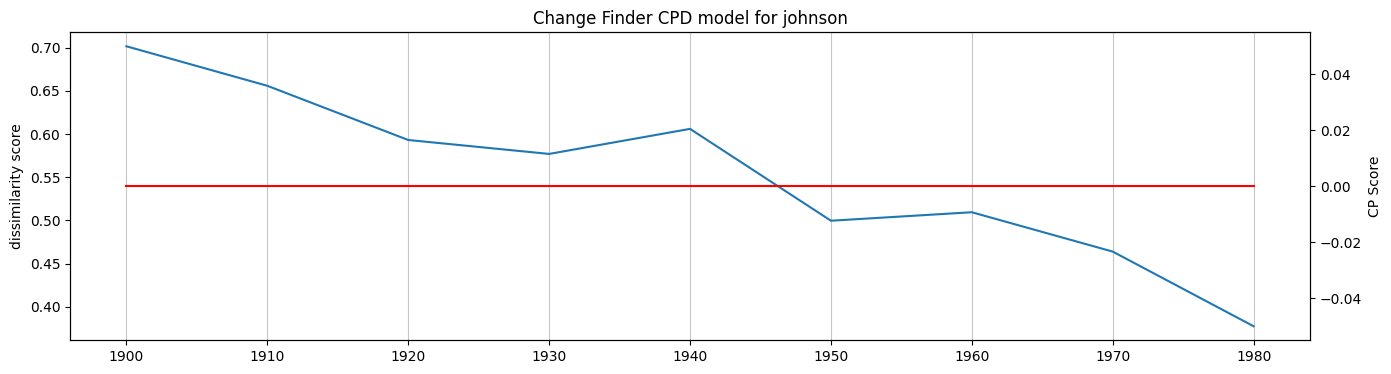

In [29]:
tsd = np.array(word3_d)

cp_score = findChangePoints_changeFinder(tsd, r=0.01, order=3, smooth=7)
plotChangePoints_changeFinder(word1_d, tsd, cp_score, 'Change Finder CPD model for '+top_3_changing_words[2])

Trial Method 2

In [30]:
!pip install ruptures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.7 MB/s eta 0:00:00


In [31]:
import ruptures as rpt

def plot_change_points_ruptures(df, ts, ts_change_all, title):

    plt.figure(figsize=(16,4))
    plt.plot(np.arange(len(df)), ts)

    plt.xlabel('Year')
    plt.ylabel('Dissimilarity')

    custom_x_ticks = np.arange(len(df))
    custom_x_labels =data['d'][:len(df)]
    plt.xticks(custom_x_ticks, custom_x_labels)

    for x in ts_change_all:
        plt.axvline(x, lw=2, color='red')

    plt.title(title)
    plt.show()

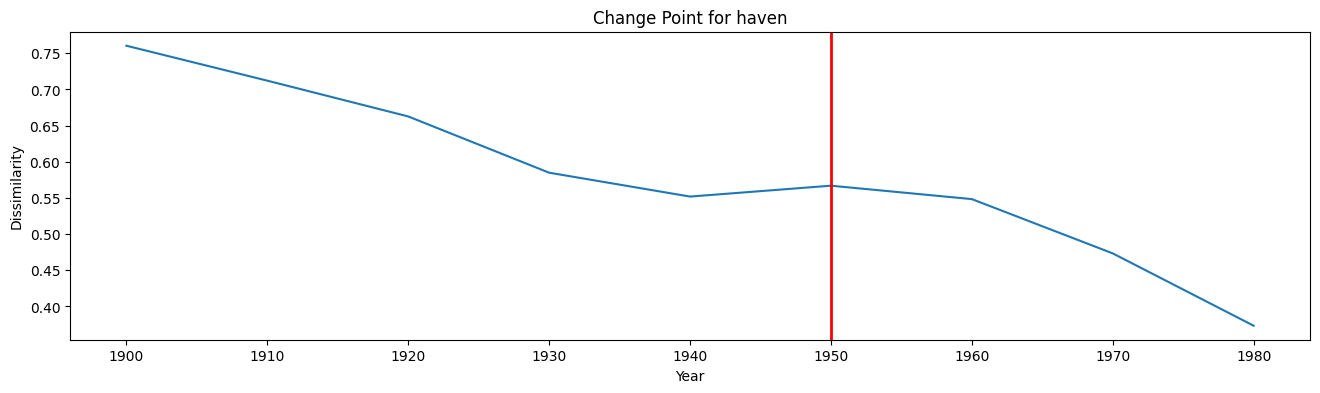

In [32]:
tsd = np.array(word1_d)

detector = rpt.Pelt(model="rbf").fit(tsd)
change_points = detector.predict(pen=1)
plot_change_points_ruptures(word1_d, tsd, change_points[:-1], 'Change Point for '+top_3_changing_words[0])

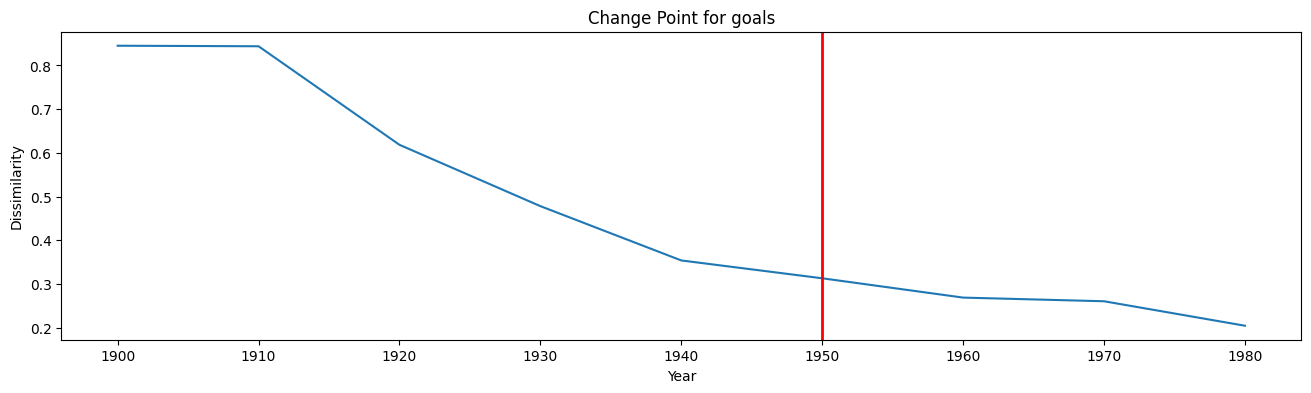

In [33]:
tsd = np.array(word2_d)

detector = rpt.Pelt(model="rbf").fit(tsd)
change_points = detector.predict(pen=1)
plot_change_points_ruptures(word1_d, tsd, change_points[:-1], 'Change Point for '+top_3_changing_words[1])

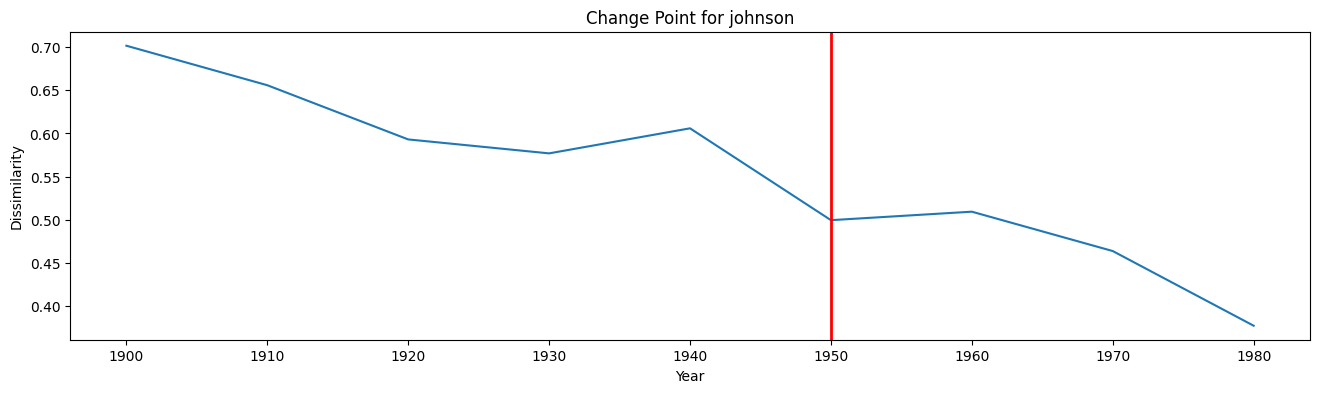

In [34]:
tsd = np.array(word3_d)

detector = rpt.Pelt(model="rbf").fit(tsd)
change_points = detector.predict(pen=1)
plot_change_points_ruptures(word1_d, tsd, change_points[:-1], 'Change Point for '+top_3_changing_words[2])